Using device cuda and Pinned memory True
Training images: 328 and Testing images: 58 (haurien de ser 328 i 58)
Training masks: 328 and Testing masks: 58 haurien de ser 328 i 58
Guardo paths images tests per a mostrar imatges vs preds vs groundtruth...
328 examples in the training set...
58 examples in the test set...
Inici del loop de training i testing: 1739092899.7337987 


  0%|          | 0/20 [00:00<?, ?it/s]

En la epoch: 1/20
Valors obtinguts -> Train loss: 1.681, Test loss: 1.632
Fins ara hem tardat: 42.41 ''


 10%|█         | 2/20 [01:21<12:03, 40.18s/it]

En la epoch: 2/20
Valors obtinguts -> Train loss: 1.550, Test loss: 1.660
Fins ara hem tardat: 81.09 ''
En la epoch: 3/20
Valors obtinguts -> Train loss: 1.538, Test loss: 1.602
Fins ara hem tardat: 117.92 ''


 20%|██        | 4/20 [02:34<10:03, 37.70s/it]

En la epoch: 4/20
Valors obtinguts -> Train loss: 1.520, Test loss: 1.577
Fins ara hem tardat: 154.23 ''


 25%|██▌       | 5/20 [03:11<09:22, 37.49s/it]

En la epoch: 5/20
Valors obtinguts -> Train loss: 1.511, Test loss: 1.568
Fins ara hem tardat: 191.34 ''


 30%|███       | 6/20 [03:47<08:39, 37.09s/it]

En la epoch: 6/20
Valors obtinguts -> Train loss: 1.512, Test loss: 1.566
Fins ara hem tardat: 227.65 ''


 35%|███▌      | 7/20 [04:24<08:00, 36.94s/it]

En la epoch: 7/20
Valors obtinguts -> Train loss: 1.502, Test loss: 1.556
Fins ara hem tardat: 264.29 ''


 40%|████      | 8/20 [05:02<07:26, 37.21s/it]

En la epoch: 8/20
Valors obtinguts -> Train loss: 1.488, Test loss: 1.607
Fins ara hem tardat: 302.08 ''


 45%|████▌     | 9/20 [05:38<06:44, 36.77s/it]

En la epoch: 9/20
Valors obtinguts -> Train loss: 1.501, Test loss: 1.552
Fins ara hem tardat: 337.86 ''


 50%|█████     | 10/20 [06:15<06:08, 36.84s/it]

En la epoch: 10/20
Valors obtinguts -> Train loss: 1.489, Test loss: 1.560
Fins ara hem tardat: 374.88 ''


 55%|█████▌    | 11/20 [06:53<05:34, 37.19s/it]

En la epoch: 11/20
Valors obtinguts -> Train loss: 1.476, Test loss: 1.529
Fins ara hem tardat: 412.84 ''


 60%|██████    | 12/20 [07:28<04:54, 36.77s/it]

En la epoch: 12/20
Valors obtinguts -> Train loss: 1.450, Test loss: 1.492
Fins ara hem tardat: 448.69 ''


 65%|██████▌   | 13/20 [08:04<04:14, 36.42s/it]

En la epoch: 13/20
Valors obtinguts -> Train loss: 1.415, Test loss: 1.504
Fins ara hem tardat: 484.32 ''


 70%|███████   | 14/20 [08:39<03:36, 36.08s/it]

En la epoch: 14/20
Valors obtinguts -> Train loss: 1.404, Test loss: 1.458
Fins ara hem tardat: 519.58 ''


 75%|███████▌  | 15/20 [09:15<02:59, 35.93s/it]

En la epoch: 15/20
Valors obtinguts -> Train loss: 1.392, Test loss: 1.468
Fins ara hem tardat: 555.18 ''


 80%|████████  | 16/20 [09:52<02:25, 36.25s/it]

En la epoch: 16/20
Valors obtinguts -> Train loss: 1.363, Test loss: 1.455
Fins ara hem tardat: 592.17 ''


 85%|████████▌ | 17/20 [10:27<01:47, 36.00s/it]

En la epoch: 17/20
Valors obtinguts -> Train loss: 1.365, Test loss: 1.454
Fins ara hem tardat: 627.58 ''


 90%|█████████ | 18/20 [11:04<01:12, 36.24s/it]

En la epoch: 18/20
Valors obtinguts -> Train loss: 1.351, Test loss: 1.409
Fins ara hem tardat: 664.36 ''


 95%|█████████▌| 19/20 [11:41<00:36, 36.36s/it]

En la epoch: 19/20
Valors obtinguts -> Train loss: 1.355, Test loss: 1.400
Fins ara hem tardat: 701.00 ''


100%|██████████| 20/20 [12:17<00:00, 36.86s/it]

En la epoch: 20/20
Valors obtinguts -> Train loss: 1.341, Test loss: 1.382
Fins ara hem tardat: 737.09 ''
[INFO] loading up test image paths...


FileNotFoundError: [Errno 2] No such file or directory: 'G:\\My Drive\\Personal\\PostgrauAIDL\\Proyecto-Grupo\\github-ICGC\\CatLC\\esteve\\resultados\\test_paths.txt'

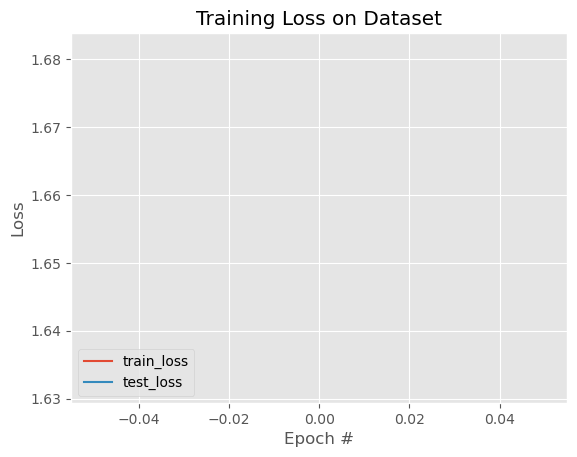

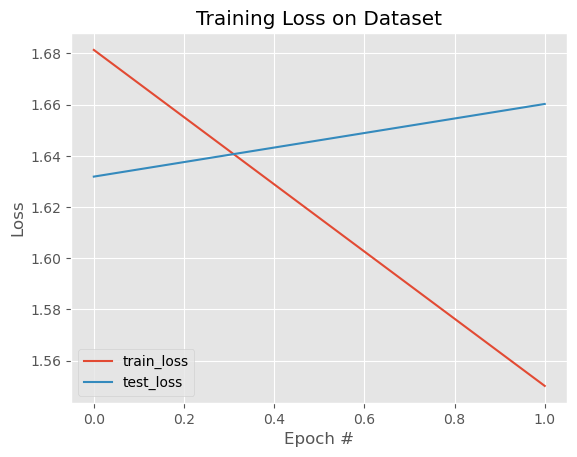

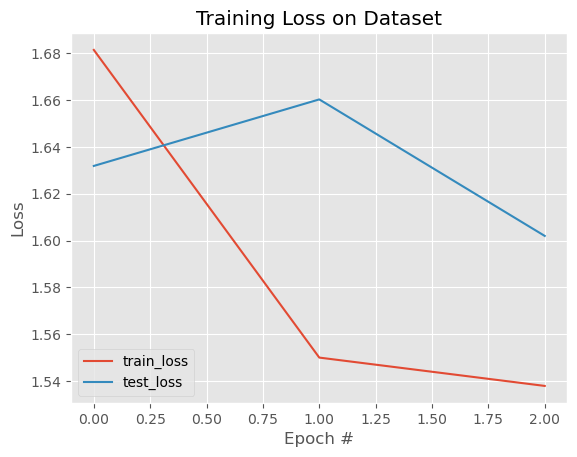

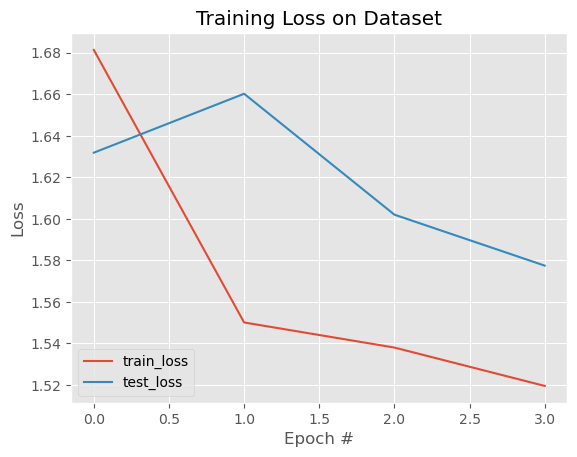

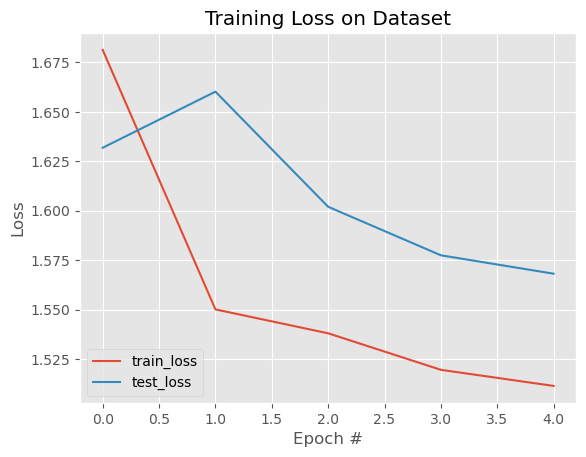

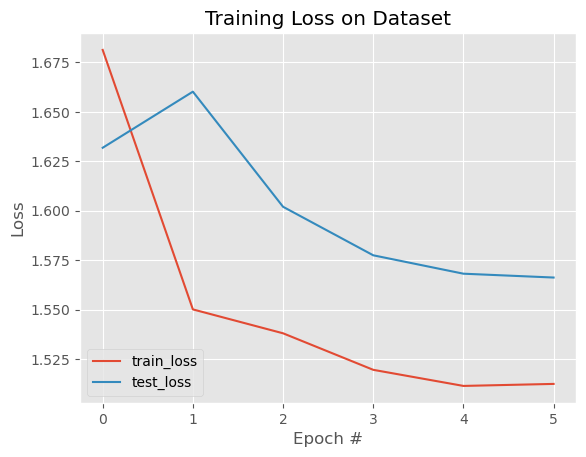

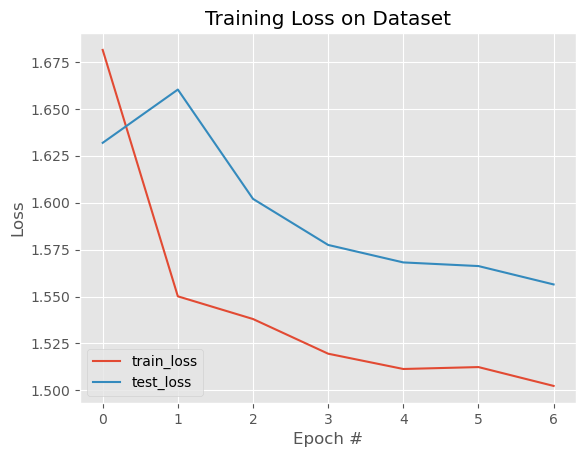

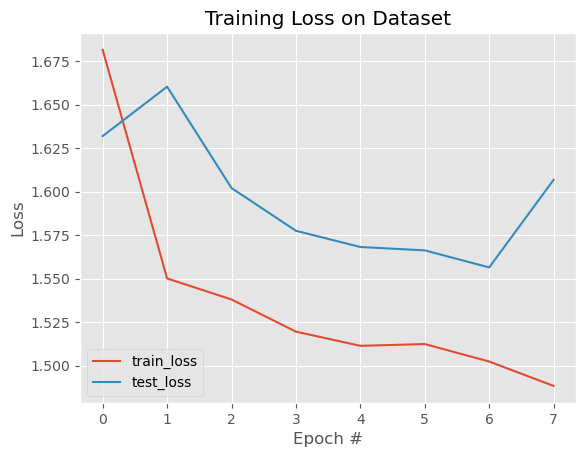

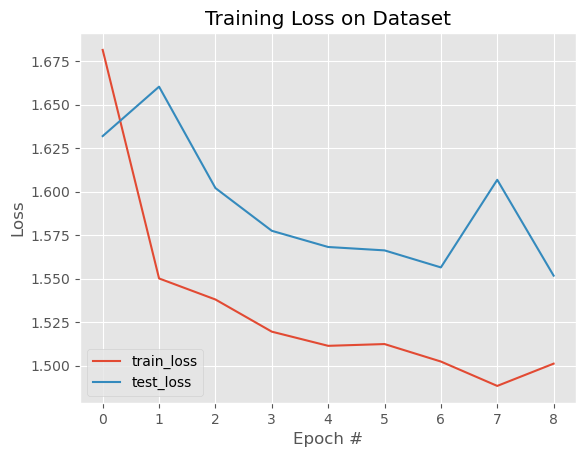

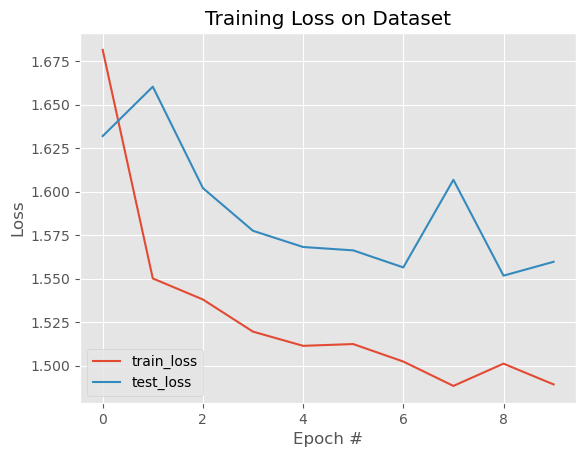

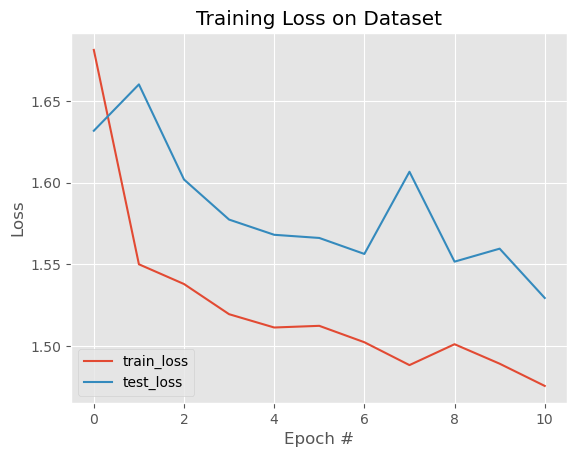

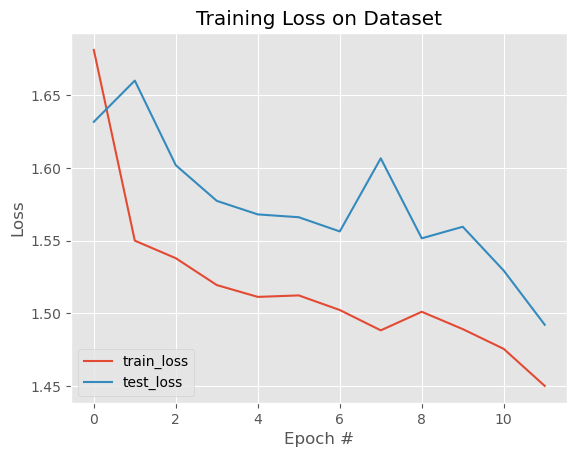

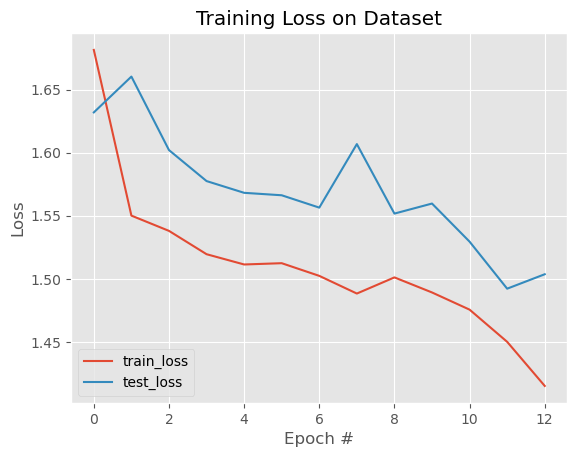

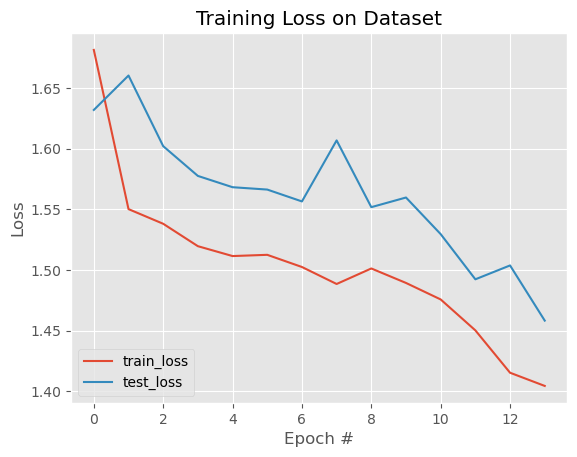

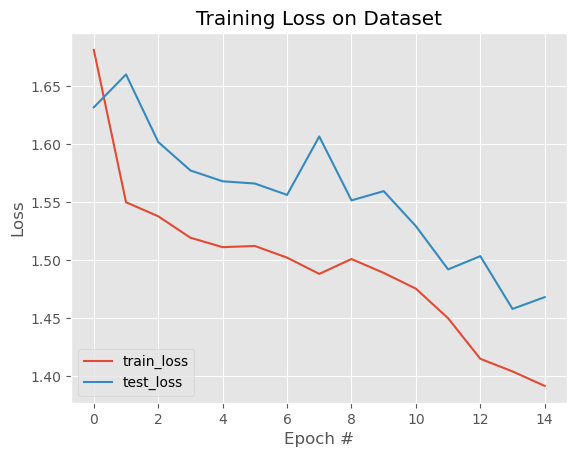

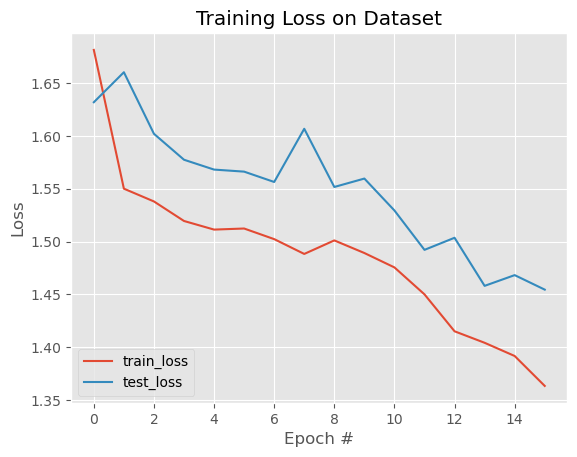

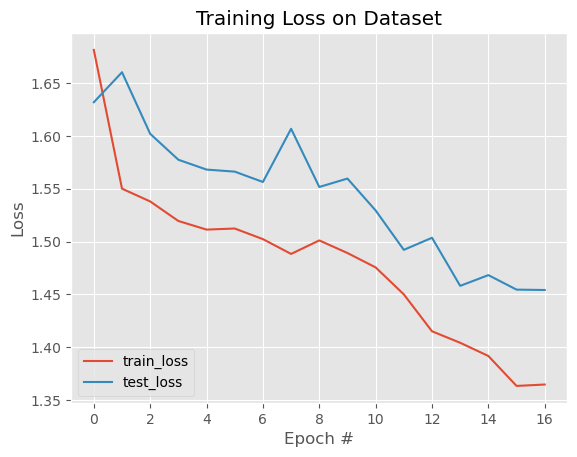

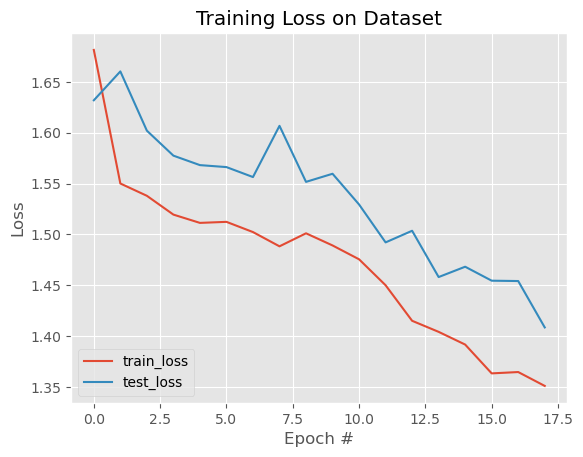

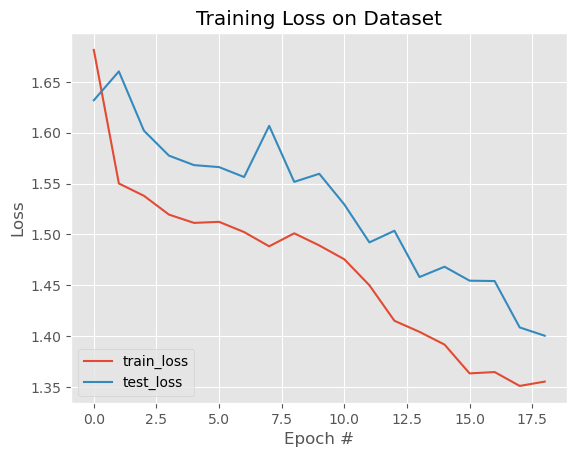

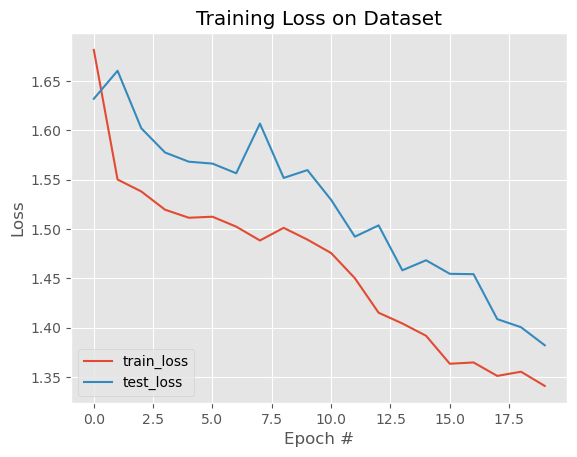

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn import BCEWithLogitsLoss
from tqdm import tqdm
from torchvision import transforms
from torchvision.transforms import CenterCrop
from torch.nn import ModuleList
from torch.nn import functional as F
import matplotlib.pyplot as plt

import rasterio
import numpy as np
import os
import time
import cv2
from pathlib import Path
from sklearn.model_selection import train_test_split


class Block(nn.Module):
    def __init__(self, inChannels, outChannels):
        super(Block, self).__init__()
        # convolution and RELU layers
        self.conv1 = nn.Conv2d(inChannels, outChannels, kernel_size=3)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(outChannels, outChannels, kernel_size=3)

    def forward(self, x):
        # apply CONV => RELU => CONV block to the inputs and return it
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)

        return x
    
class Encoder(nn.Module):
    def __init__(self, channels=(3, 16, 32, 64)):
            super().__init__()
            # create the encoder blocks and maxpooling layer
            self.encBlocks = nn.ModuleList([
               Block(channels[i], channels[i + 1]) for i in range(len(channels) - 1)
            ])
            self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        # initialize an empty list to store the intermediate outputs
        blockOutputs = []
        # loop through the encoder blocks and update the blockOutputs list
        for block in self.encBlocks:
            x = block(x)
            blockOutputs.append(x)
            x = self.pool(x)

        return blockOutputs

class Decoder(nn.Module):
    def __init__(self, channels=(64, 32, 16)):
          super().__init__()
          # initialize the number of channels, upsampler blocks, and decoder blocks
          self.upconvs = nn.ModuleList([
              nn.ConvTranspose2d(channels[i], channels[i+1], kernel_size=2, stride=2)
              for i in range(len(channels)-1)
          ])
          self.dec_blocks = nn.ModuleList([
              Block(channels[i], channels[i + 1]) for i in range(len(channels) - 1)
          ])

    def forward(self, x, encFeatures):
      # loop through the number of channels
        for i in range(len(self.upconvs)):
            x = self.upconvs[i](x)
            # Crop the current features from the encoder blocks,
            # concatenate them with the current upsampled features,
            # and pass the concatenated output through the current
            # decoder block
            encFeat = self.crop(encFeatures[i], x)
            x = torch.cat([x, encFeat], dim=1)
            x = self.dec_blocks[i](x)

        # return the final decoder output
        return x

    def crop(self, encFeatures, x):
          # grab the dimensions of the inputs, and crop the encoder
          # features to match the dimensions
          (_, _, H, W) = x.shape
          encFeatures = CenterCrop([H, W])(encFeatures)
          # return the cropped features
          return encFeatures

class UNet(nn.Module):
    def __init__(self, encChannels=(3, 16, 32, 64),
          decChannels=(64, 32, 16),
          nbClasses=12, retainDim=True,
          outSize=(1000, 1000)):

        super().__init__()
        # initialize the encoder and decoder
        self.encoder = Encoder(encChannels)
        self.decoder = Decoder(decChannels)

        # initialize the regression head and store the class variables
        self.head = nn.Conv2d(decChannels[-1], nbClasses, kernel_size=1)
        self.retainDim = retainDim
        self.outSize = outSize

    def forward(self, x):
        # grab the features from the encoder
        encFeatures = self.encoder(x)

        # pass the encoder features through decoder making sure that
        # their dimensions are suited for concatenation
        decFeatures = self.decoder(encFeatures[::-1][0], encFeatures[::-1][1::])

        # pass the decoder features through the regression head to
        # obtain the segmentation mask
        map = self.head(decFeatures)

        # check to see if we are retaining the original output
        # dimensions and if so, then resize the output to match them
        if self.retainDim:
          map = F.interpolate(map, self.outSize)

        # return the segmentation map
        return map



class GeotiffDataset(Dataset):
    # Cal que la imatge i la màscara tinguin el mateix nom
    def __init__(self, imagePaths, maskPaths, transforms = None):
        # store the image and mask filepaths, and augmentation
        # transforms
        self.imagePaths = imagePaths
        self.maskPaths = maskPaths
        self.transforms = transforms

    def __len__(self):
        # return the number of total samples contained in the dataset
        return len(self.imagePaths)
    
    def __getitem__(self, idx):
        # grab the image path from the current index
        imagePath = self.imagePaths[idx]
        maskPath = self.maskPaths[idx]

        # Load the image from disk and read the associated mask 
        image = cv2.imread(imagePath, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        with rasterio.open(maskPath) as mask_src:
            mask = mask_src.read(1)  # Read the first (and only) band
        
        # Ensure mask is an integer tensor
        mask = torch.tensor(mask, dtype=torch.long)  # class labels

        #print(f"Image shape: {image.shape}, Mask shape: {mask.shape}")

        # check to see if we are applying any transformations
        # Apply transforms if provided
        if self.transforms:
            image = self.transforms(image)

        # Convert image to tensor manually if no transforms are applied
        else:
            image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)  # HWC -> CHW

        return (image, mask)

def iou_score(preds, labels, num_classes=12):
    preds = torch.argmax(preds, dim=1)
    ious = []
    for cls in range(num_classes):
        pred_cls = preds == cls
        label_cls = labels == cls
        intersection = (pred_cls & label_cls).sum().float()
        union = (pred_cls | label_cls).sum().float()
        ious.append(intersection / (union + 1e-8))
    return torch.mean(torch.tensor(ious))

def dice_score(preds, labels, num_classes=12):
    preds = torch.argmax(preds, dim=1)
    dice = []
    for cls in range(num_classes):
        pred_cls = preds == cls
        label_cls = labels == cls
        intersection = (pred_cls & label_cls).sum().float()
        dice.append(2. * intersection / (pred_cls.sum().float() + label_cls.sum().float() + 1e-8))
    return torch.mean(torch.tensor(dice))


def prepare_plot(origImage, origMask, predMask):
    # initialize our figure
    figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
    # plot the original image, its mask, and the predicted mask
    ax[0].imshow(origImage)
    ax[1].imshow(origMask)
    ax[2].imshow(predMask)
    # set the titles of the subplots
    ax[0].set_title("Image")
    ax[1].set_title("Original")
    ax[2].set_title("Predicted by Model")
    # set the layout of the figure and display it
    figure.tight_layout()
    figure.show()

def make_predictions(model, imagePath):
    # set model to evaluation mode
    model.eval()
    # turn off gradient tracking
    with torch.no_grad():
        # load the image from disk, swap its color channels, cast it
        # to float data type, and scale its pixel values
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype("float32") / 255.0
        # resize the image and make a copy of it for visualization
        image = cv2.resize(image, (800, 600))
        orig = image.copy()
        # find the filename and generate the path to ground truth
        # mask
        filename = imagePath.split(os.path.sep)[-1]
        filename_mask = filename.split(".jpg")[0] + '.png'
        groundTruthPath = os.path.join(MASK_DATASET_PATH,
          filename_mask)
        # load the ground-truth segmentation mask in grayscale mode
        # and resize it
        gtMask = cv2.imread(groundTruthPath, 0)
        gtMask = cv2.resize(gtMask, (INPUT_IMAGE_WIDTH,
           INPUT_IMAGE_HEIGHT))

        # make the channel axis to be the leading one, add a batch
        # dimension, create a PyTorch tensor, and flash it to the
        # current device
        image = np.transpose(image, (2, 0, 1))
        image = np.expand_dims(image, 0)
        image = torch.from_numpy(image).to(DEVICE)
        # make the prediction, pass the results through the sigmoid
        # function, and convert the result to a NumPy array
        predMask = model(image).squeeze()
        predMask = torch.sigmoid(predMask)
        predMask = predMask.cpu().numpy()
        # filter out the weak predictions and convert them to integers
        predMask = (predMask > THRESHOLD) * 255
        predMask = predMask.astype(np.uint8)
        # prepare a plot for visualization
        prepare_plot(orig, gtMask, predMask)



if __name__ == '__main__':

    torch.cuda.empty_cache() # Clean the Cuda cache

    NUM_CHANNELS = 3
    NUM_CLASSES = 12

    INIT_LR = 0.001
    NUM_EPOCHS = 20
    BATCH_SIZE = 4
    THRESHOLD = 0.5 # define threshold to filter weak predictions
    
    # define the input image dimensions
    INPUT_IMAGE_WIDTH = 1000
    INPUT_IMAGE_HEIGHT = 1000

    # define the path to the images and masks dataset
    IMAGE_DATASET_PATH = r'D:\aidl_projecte\sentinel2april\tile_norm'
    MASK_DATASET_PATH = r'D:\aidl_projecte\tiles_masks\tiffsv2'
    TEST_SPLIT = 0.15
    TEST_PATHS_LIST = os.path.sep.join([IMAGE_DATASET_PATH + r"\output", 'test_paths.txt'])

    BASE_OUTPUT = r'G:\My Drive\Personal\PostgrauAIDL\Proyecto-Grupo\github-ICGC\CatLC\esteve\resultados'
    MODEL_PATH = os.path.join(BASE_OUTPUT, "unet_satelitales.pth")
    PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "resultados.png"])
    TEST_PATHS = os.path.sep.join([BASE_OUTPUT, "test_paths.txt"])

    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    PIN_MEMORY = True if DEVICE == "cuda" else False
    print(f"Using device {DEVICE} and Pinned memory {PIN_MEMORY}")

    image_paths = [
            os.path.join(IMAGE_DATASET_PATH, file)
            for file in os.listdir(IMAGE_DATASET_PATH)
            if file.lower().endswith('png') and os.path.isfile(os.path.join(IMAGE_DATASET_PATH, file))
    ]

    masks_path = [
            os.path.join(MASK_DATASET_PATH, file)
            for file in os.listdir(MASK_DATASET_PATH)
            if file.lower().endswith('tif') and os.path.isfile(os.path.join(MASK_DATASET_PATH, file))
    ]

    # Split training and testing splits using 85%
    split = train_test_split(image_paths, masks_path, test_size=TEST_SPLIT)
    (trainImages, testImages) = split[:2]
    (trainMasks, testMasks) = split[2:]

    print(f"Training images: {len(trainImages)} and Testing images: {len(testImages)} (haurien de ser 328 i 58)")
    print(f"Training masks: {len(trainMasks)} and Testing masks: {len(testMasks)} haurien de ser 328 i 58")

    # write the testing image paths to disk so that we can use then
    # when evaluating/testing our model
    print("Guardo paths images tests per a mostrar imatges vs preds vs groundtruth...")
    f = open(TEST_PATHS_LIST, "w")
    f.write("\n".join(testImages))
    f.close()

    # Cal transformar imatge a Tensor
    trans = transforms.Compose([transforms.ToPILImage(),
            transforms.Resize((INPUT_IMAGE_HEIGHT, INPUT_IMAGE_WIDTH)),
            transforms.ToTensor()])

    # Creació de datasets i dataloaders
    trainDS = GeotiffDataset(imagePaths=trainImages, maskPaths=trainMasks, transforms=trans)
    testDS = GeotiffDataset(imagePaths=testImages, maskPaths=testMasks, transforms=trans)
    trainLoader = DataLoader(trainDS, shuffle=True, batch_size=BATCH_SIZE, pin_memory=PIN_MEMORY, num_workers=0)
    testLoader = DataLoader(testDS, shuffle=False, batch_size=BATCH_SIZE, pin_memory=PIN_MEMORY, num_workers=0)
    print(f"{len(trainDS)} examples in the training set...")
    print(f"{len(testDS)} examples in the test set...")

    # Initialize model, loss, and optimizer
    unet = UNet()
    unet = unet.to(DEVICE)

    #lossFunc = nn.BCEWithLogitsLoss() és clasificacion binaria
    lossFunc = nn.CrossEntropyLoss()
    opt = optim.Adam(unet.parameters(), lr=INIT_LR)

    # Càlcul de steps per epoch
    trainSteps = len(trainDS) // BATCH_SIZE
    testSteps = len(testDS) // BATCH_SIZE

    #Diccionari a on guardo evolució dels resultats de l'entrenament
    H = {"train_loss": [], "test_loss": []}

    # loop over epochs
    startTime = time.time()
    print(f"Inici del loop de training i testing: {startTime} ")

    for e in tqdm(range(NUM_EPOCHS)):
        # Training mode
        unet.train()
        
        totalTrainLoss = 0
        totalTestLoss = 0
        
        for (i, (x, y)) in enumerate(trainLoader):
            
            (x, y) = (x.to(DEVICE), y.to(DEVICE))

            pred = unet(x)
            
            # Per evitar problemes amb NaN o Inf
            assert not (torch.isnan(pred).any() and torch.isinf(pred).any()), "🚨 Problemes en la predicció"
            
            # El dataset no té clases de 0 a 11 com espera CrossEntropyLoss, sinó de 1 a 12. 
            # Per tant, cal restar 1 a las clases para que estén en el rango
            y = y -1 
            # També he trobat valores de classe > 12, q donaven errors en el calcul de la loss amb CrossEntropyLoss i CUDA
            # Decideixo fer un clamp -> és una decissió discutible

            y = torch.clamp(y, min=0, max=11) #los valores menores de 0 los pongo a , y los mayores de 11 a 11
            assert torch.all((y >= 0) & (y <= 11)), "🚨 Found invalid class labels in y!"
            
            loss = lossFunc(pred, y)
            #print(f"Prediction size: {pred.size()}, Ground truth size: {y.size()}")

            # Típic: eliminar gradients anterios i backpropagation
            opt.zero_grad()
            loss.backward()
            opt.step()

            # Aquí acumulem la loss per a cada batch, per a calcular la loss mitjana
            totalTrainLoss += loss #original

        # Fem testing
        with torch.no_grad():
            
            unet.eval()
            
            # loop over the validation set
            for (x, y) in testLoader:
                  
                  (x, y) = (x.to(DEVICE), y.to(DEVICE))
                  
                  pred = unet(x)
                  
                  # El mateix raonament que abans
                  y = y -1 
                  y = torch.clamp(y, min=0, max=11) #los valores menores de 0 los pongo a , y los mayores de 11 a 11
                  assert torch.all((y >= 0) & (y <= 11)), "🚨 Found invalid class labels in y!"
                  
                  totalTestLoss += lossFunc(pred, y) 
                  
            # Calculo la mitja
            avgTrainLoss = totalTrainLoss / trainSteps
            avgTestLoss = totalTestLoss / testSteps

            # Afegim els resultats al diccionari
            H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
            H["test_loss"].append(avgTestLoss.cpu().detach().numpy())
            
            print("En la epoch: {}/{}".format(e + 1, NUM_EPOCHS))
            print("Valors obtinguts -> Train loss: {:.3f}, Test loss: {:.3f}".format(avgTrainLoss, avgTestLoss))
            print("Fins ara hem tardat: {:.2f} ''".format(time.time() - startTime))
    
        plt.style.use("ggplot")
        plt.figure()
        plt.plot(H["train_loss"], label="train_loss")
        plt.plot(H["test_loss"], label="test_loss")
        plt.title("Training Loss on Dataset")
        plt.xlabel("Epoch #")
        plt.ylabel("Loss")
        plt.legend(loc="lower left")
        plt.savefig(PLOT_PATH)
        # serialize the model to disk
        torch.save(unet, MODEL_PATH)

    # load the image paths in our testing file and randomly select 10
    # image paths
    print("[INFO] loading up test image paths...")
    imagePaths = open(TEST_PATHS).read().strip().split("\n")
    imagePaths = np.random.choice(imagePaths, size=10)
    # load our model from disk and flash it to the current device
    print("[INFO] load up model...")
    unet = torch.load(MODEL_PATH).to(DEVICE)
    # iterate over the randomly selected test image paths
    for path in imagePaths:
        # make predictions and visualize the results
        make_predictions(unet, path)        